In [5]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint


In [33]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(256,256,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=7,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │       7,526,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,057 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,915,447 (30.20 MB)

 Trainable params: 7,915,447 (30.20 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=12.,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.15,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [49]:
train_set=train_datagen.flow_from_directory('/content/datasets/dataset/train',
                                            target_size=(256,256),
                                            batch_size=8,
                                            color_mode='grayscale',
                                            classes=["L","background","four","three","thumbsup","two","up"],
                                            class_mode='categorical',shuffle=True)

Found 10341 images belonging to 7 classes.


In [50]:
test_set=test_datagen.flow_from_directory('/content/datasets/dataset/test',
                                            target_size=(256,256),
                                            batch_size=8,
                                            color_mode='grayscale',
                                            classes=["L","background","four","three","thumbsup","two","up"],
                                            class_mode='categorical',shuffle=False)

Found 3460 images belonging to 7 classes.


In [51]:
callback_list=[EarlyStopping(monitor='val_loss',patience=10),
               ModelCheckpoint(filepath='model.keras',monitor='val_loss',save_best_only=True,verbose=1)
               ]

In [52]:
steps_per_epoch = train_set.samples 
validation_steps = test_set.samples 


In [53]:
model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=test_set,
    validation_steps=validation_steps,
    callbacks=callback_list
)


Epoch 1/5
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9927 - loss: 0.0303
Epoch 1: val_loss improved from inf to 6.25690, saving model to model.keras
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.9927 - loss: 0.0303 - val_accuracy: 0.7564 - val_loss: 6.2569
Epoch 2/5
   1/1292 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 1.0000 - loss: 2.6822e-06
Epoch 2: val_loss improved from 6.25690 to 0.00000, saving model to model.keras
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.6822e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1290/1292 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9945 - loss: 0.0187
Epoch 3: val_loss did not improve from 0.00000
1292/1292 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9945 - loss: 0.0187 - val_accuracy: 0.7931 - val_loss: 5.7772
Epoch 4/5
   1/1292 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 1.0000 - loss: 8.2999e-06
Epoch 4: val_loss did not improve from 0.00000
1292/1292 ━━━━━━━━━

In [56]:
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f"Test Accuracy: {test_accuracy:.2f}")


433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7769 - loss: 5.4502
Test Accuracy: 0.78


In [58]:
model_json=model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('model.weights.h5')
print("saved")

saved


TESTING

In [59]:
from keras.preprocessing import image
import numpy as np
from keras.models import model_from_json
from keras.models import load_model


In [60]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model=model_from_json(loaded_model_json)
model.load_weights('model.weights.h5')
print("LOADED from disk")

LOADED from disk


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


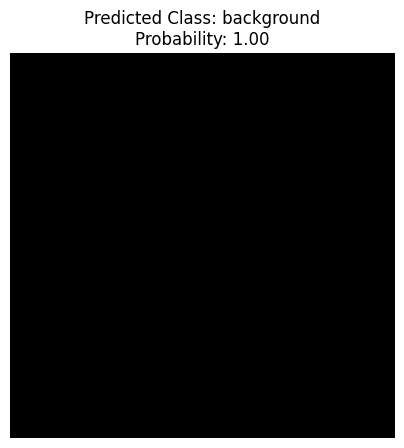

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


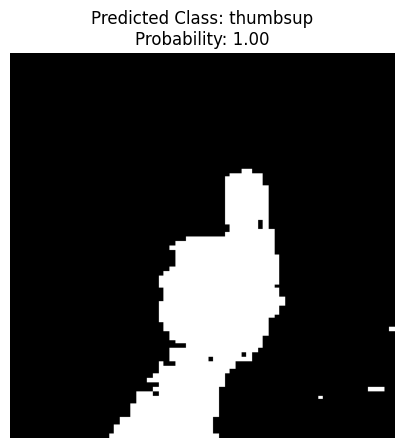

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


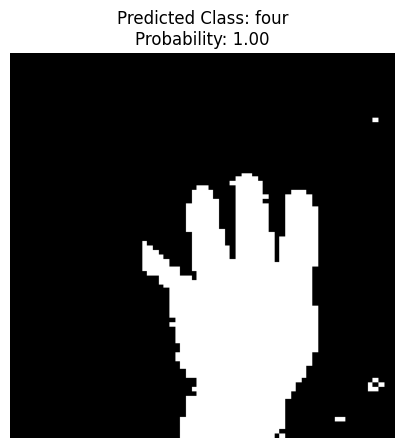

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


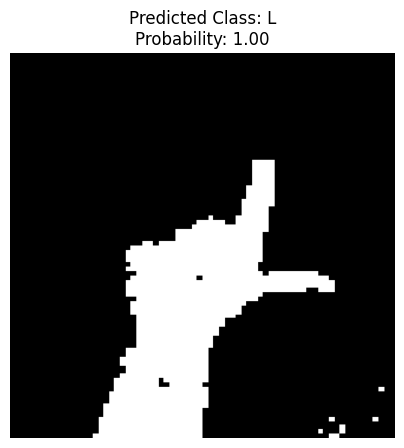

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


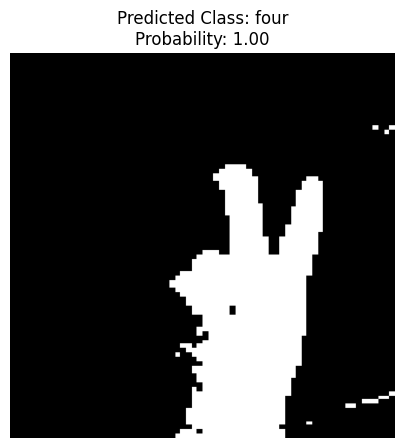

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


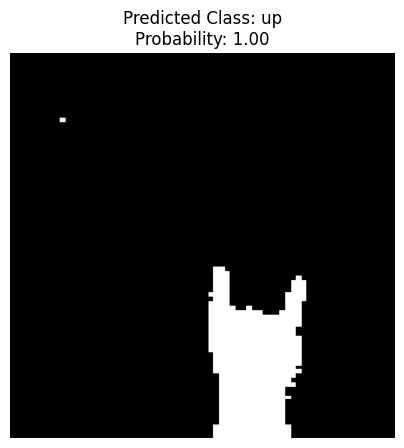

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


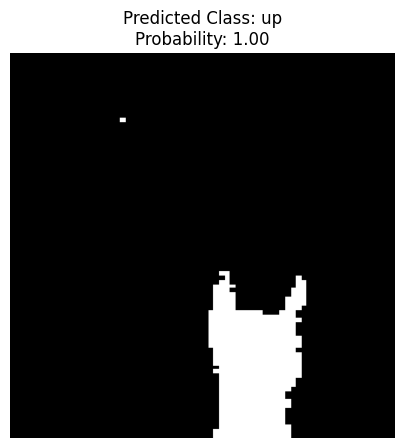

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


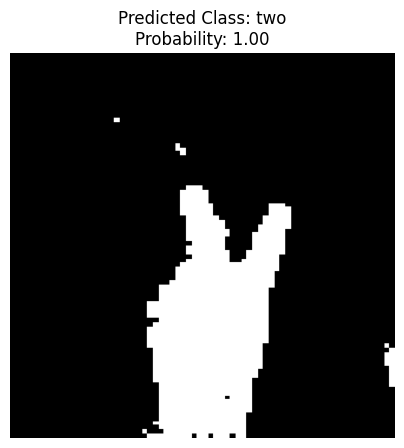

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


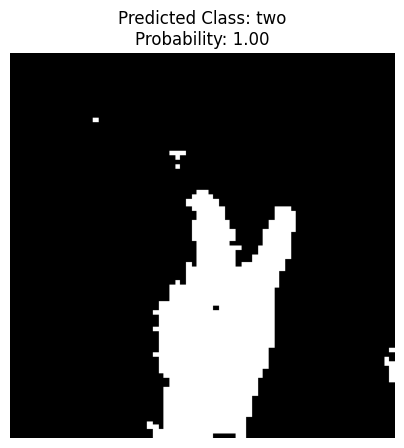

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


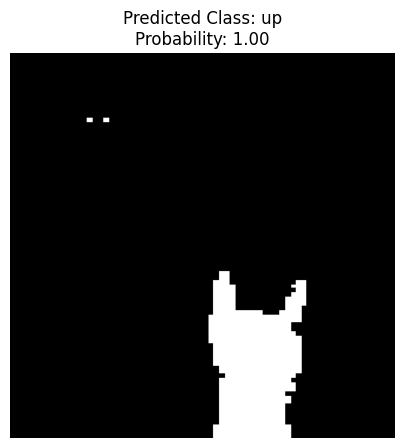

In [63]:
import matplotlib.pyplot as plt
import os

def classify_and_visualize(img_file):
    

        test_image = image.load_img(img_file, target_size=(256, 256), color_mode='grayscale')
        test_image_array = image.img_to_array(test_image)
        test_image_array = np.expand_dims(test_image_array, axis=0)

        #predictions
        result = model.predict(test_image_array)
        arr = np.array(result[0])


        max_prob_index = arr.argmax(axis=0)
        classes = ["L", "background", "four", "three", "thumbsup", "two", "up"]
        predicted_class = classes[max_prob_index]
        probability = arr[max_prob_index]


        plt.figure(figsize=(5, 5))
        plt.imshow(test_image, cmap='gray')
        plt.axis('off')
        plt.title(f'Predicted Class: {predicted_class}\nProbability: {probability:.2f}')
        plt.show()
path = "/content/datasets/dataset/check"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if file.lower().endswith('.png'):
            files.append(os.path.join(r, file))

for f in files:
    classify_and_visualize(f)
